In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import math
tf.logging.set_verbosity(tf.logging.ERROR)  # or any {DEBUG, INFO, WARN, ERROR, FATAL}

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [3]:
data.test.cls = np.argmax(data.test.labels, axis=1)

In [4]:
img_size = 28

img_size_flat = img_size * img_size

img_shape = (img_size, img_size)

num_channels = 1

num_classes = 10

In [5]:
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')

In [6]:
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])

In [7]:
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')

In [8]:
y_true_cls = tf.argmax(y_true, dimension=1)

In [9]:
def get_weights_variable(layer_name):
    with tf.variable_scope(layer_name, reuse=True):
        variable = tf.get_variable('kernel')
        bias=tf.get_variable('bias')
    return variable, bias

In [10]:
def setgraph(logits):
    y_pred = tf.nn.softmax(logits=logits)
    y_pred_cls = tf.argmax(y_pred, dimension=1)

    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=logits)
    global loss 
    loss= tf.reduce_mean(cross_entropy)
    
    correct_prediction = tf.equal(y_pred_cls, y_true_cls)
    global accuracy 
    accuracy= tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    opt = tf.train.AdamOptimizer(learning_rate=1e-4)
    global optimizer 
    optimizer= opt.minimize(loss)

In [11]:
loss_list=[]
accu_list=[]

In [12]:
train_batch_size=64

num_iterations=int(len(data.train.images)/train_batch_size)+1

def optimize():

    for i in range(0,
                    num_iterations):
        
        x_batch, y_true_batch = data.train.next_batch(train_batch_size,shuffle=True)
        
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}
        
        session.run(optimizer, feed_dict=feed_dict_train)
        
        los=session.run(loss,feed_dict=feed_dict_train)
        acc=session.run(accuracy,feed_dict=feed_dict_train)
        
        loss_list.append(los)
        accu_list.append(acc)
        

In [29]:
test_batch_size = 256

y_pred = tf.nn.softmax(logits=logits)
y_pred_cls = tf.argmax(y_pred, dimension=1)

def print_test_accuracy():

    num_test = len(data.test.images)

    cls_pred = np.zeros(shape=num_test, dtype=np.int)

    i = 0

    while i < num_test:

        j = min(i + test_batch_size, num_test)

        images = data.test.images[i:j, :]

        labels = data.test.labels[i:j, :]

        feed_dict = {x: images,
                     y_true: labels}

        cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)

        i = j

    cls_true = data.test.cls

    correct = (cls_true == cls_pred)

    correct_sum = correct.sum()

    acc = float(correct_sum) / num_test

    los=session.run(loss,feed_dict=feed_dict)
    
    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
    
    print(msg.format(acc, correct_sum, num_test))
    
    msg = "Loss on Test-Set: {0:.3}"
    
    print(msg.format(los))    

In [17]:
net = tf.layers.dense(inputs=x, name='layer_fc01',
                      units=128, activation=tf.nn.relu)
net = tf.layers.dense(inputs=net, name='layer_fc02',
                      units=128, activation=tf.nn.relu)
logits = tf.layers.dense(inputs=net, name='layer_fc_out0',
                      units=num_classes, activation=None)
setgraph(logits)

In [30]:
session = tf.Session()
session.run(tf.global_variables_initializer())

for epoch in range(0,10):
    print("epoch "+str(epoch))
    optimize()
    print_test_accuracy()

epoch 0
Accuracy on Test-Set: 91.8% (9178 / 10000)
Loss on Test-Set: 0.2
epoch 1
Accuracy on Test-Set: 93.2% (9323 / 10000)
Loss on Test-Set: 0.1
epoch 2
Accuracy on Test-Set: 94.2% (9419 / 10000)
Loss on Test-Set: 0.1
epoch 3
Accuracy on Test-Set: 94.8% (9480 / 10000)
Loss on Test-Set: 0.08
epoch 4
Accuracy on Test-Set: 95.5% (9548 / 10000)
Loss on Test-Set: 0.08
epoch 5
Accuracy on Test-Set: 95.5% (9547 / 10000)
Loss on Test-Set: 0.05
epoch 6
Accuracy on Test-Set: 96.0% (9596 / 10000)
Loss on Test-Set: 0.05
epoch 7
Accuracy on Test-Set: 96.4% (9637 / 10000)
Loss on Test-Set: 0.03
epoch 8
Accuracy on Test-Set: 96.5% (9645 / 10000)
Loss on Test-Set: 0.03
epoch 9
Accuracy on Test-Set: 96.7% (9667 / 10000)
Loss on Test-Set: 0.02


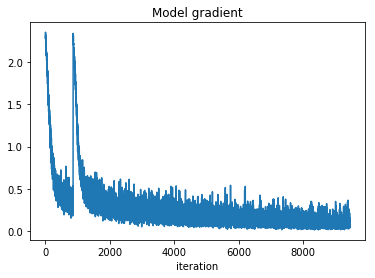

In [21]:
plt.plot(loss_list)
plt.title('Model gradient')
plt.ylabel('')
plt.xlabel('iteration')
plt.show()

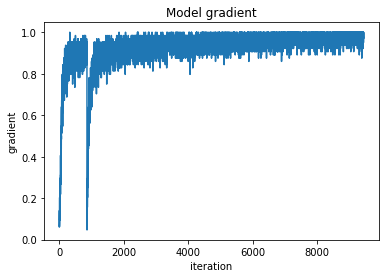

In [22]:
plt.plot(accu_list)
plt.title('Model gradient')
plt.ylabel('gradient')
plt.xlabel('iteration')
plt.show()

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(result, result_loss)

plt.title("", fontsize=19)
plt.xlabel("minimum_ratio", fontsize=10)
plt.ylabel("loss", fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=9)
plt.show()


In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(batch,accu_testing_list , marker='o', linestyle='--', color='b', label='test')
ax1.plot(batch,accu_training_list , marker='o', linestyle='-', color='b', label='train')
ax1.set_xlabel('batch size')
ax1.set_ylabel('accu') 
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(batch,sensitive , marker='o', linestyle='-', color='r', label='sensitive')
ax2.set_ylabel('sensitive') 
ax2.legend(loc='upper right')

plt.title('loss')
plt.gca().set_xscale('log')
plt.show()